In [19]:
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

from raytracer import *
from heliostat_raytracer import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
hstats = create_heliostat_field(20, [5, 5])
receiver_pos = np.array([0, 0, 10])
incident_vec = norm_vector(np.array([0.5, 0, -1]))

model = raytrace_heliostat_field(hstats, incident_vec, receiver_pos, reflecting_width=0.1)
print(model['mirror_positions'])

[[-9.98663694e+00 -1.00200446e+01  6.68153105e-03]
 [-1.00133631e+01 -9.97995541e+00 -6.68153105e-03]
 [-4.98333333e+00 -1.00166667e+01  8.33333333e-03]
 [-5.01666667e+00 -9.98333333e+00 -8.33333333e-03]
 [ 2.04124145e-02 -1.00102062e+01  1.02062073e-02]
 [-2.04124145e-02 -9.98979379e+00 -1.02062073e-02]
 [ 5.02236068e+00 -1.00000000e+01  1.11803399e-02]
 [ 4.97763932e+00 -1.00000000e+01 -1.11803399e-02]
 [ 1.00204124e+01 -9.98979379e+00  1.02062073e-02]
 [ 9.97958759e+00 -1.00102062e+01 -1.02062073e-02]
 [-9.99219131e+00 -5.02342606e+00  3.90434405e-03]
 [-1.00078087e+01 -4.97657394e+00 -3.90434405e-03]
 [-4.98908911e+00 -5.02182179e+00  5.45544726e-03]
 [-5.01091089e+00 -4.97817821e+00 -5.45544726e-03]
 [ 1.66666667e-02 -5.01666667e+00  8.33333333e-03]
 [-1.66666667e-02 -4.98333333e+00 -8.33333333e-03]
 [ 5.02236068e+00 -5.00000000e+00  1.11803399e-02]
 [ 4.97763932e+00 -5.00000000e+00 -1.11803399e-02]
 [ 1.00166667e+01 -4.98333333e+00  8.33333333e-03]
 [ 9.98333333e+00 -5.01666667e+

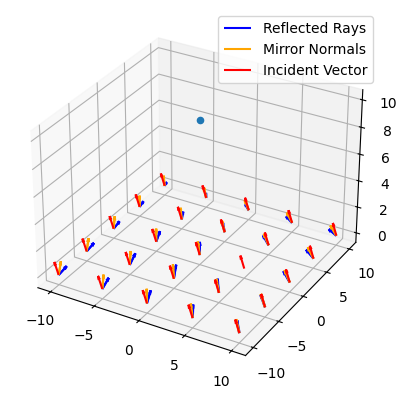

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(model['mirror_positions'][:, 0], model['mirror_positions'][:, 1], model['mirror_positions'][:, 2], 
            model['reflected_vectors'][:, 0],model['reflected_vectors'][:, 1], model['reflected_vectors'][:, 2], 
            color='b', label="Reflected Rays")
ax.quiver(model['mirror_positions'][:, 0], model['mirror_positions'][:, 1], model['mirror_positions'][:, 2], 
            model['mirror_normals'][:, 0],model['mirror_normals'][:, 1], model['mirror_normals'][:, 2], 
            color='orange', label="Mirror Normals")
ax.quiver(hstats[:, 0], hstats[:, 1], hstats[:, 2], 
            -incident_vec[0], -incident_vec[1], -incident_vec[2], 
            color='red', label="Incident Vector")           
ax.scatter(receiver_pos[0], receiver_pos[1], zs=receiver_pos[2])
ax.legend()
plt.show()